***The Sparks Foundation***

**Data Science and Business Intelligence Internship**

**Task-4 Exploratory Data Analysis on Global Terrorism,find out hot zones of terrorism and security issues.**


***Importing packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

In [1]:
data = pd.read_csv("C:/Users/Abhishek/OneDrive/Desktop/globalterrorismdb_0718dist.csv",encoding="latin1")
data.head(5)

<IPython.core.display.Javascript object>

C:\Users\Abhishek\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3427: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


***Data Preprocessing***

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [3]:
col = []
for i in data.columns:
    col.append(i)
print(col)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

<IPython.core.display.Javascript object>

<AxesSubplot:>

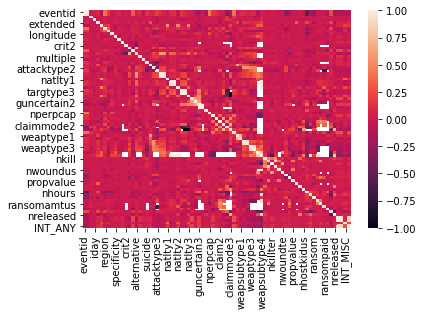

In [4]:
sns.heatmap(data.corr())

In [5]:
data = data[['iyear','imonth','iday','country_txt','region_txt',
            'provstate','city','latitude','longitude','location',
            'summary','attacktype1_txt','targtype1_txt','gname',
            'motive','weaptype1_txt','nkill','nwound']]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                    'provstate':'State','city':'City','latitude':'Latitude','longitutde':'Longitude','summary':'Summary',
                    'attacktype1_txt':'Attack Type','targtype1_txt':'Target Type','gname':'Group Name','motive':'Motive',
                    'weaptype1_txt':'Weapon Used','nkill':'No of Kills','nwound':'No of Wounded'},inplace=True)

In [7]:
data.isna().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                434
Latitude           4556
longitude          4557
location         126196
Summary           66129
Attack Type           0
Target Type           0
Group Name            0
Motive           131130
Weapon Used           0
No of Kills       10313
No of Wounded     16311
dtype: int64

In [9]:
data['No of Kills'] = data['No of Kills'].replace(np.nan,0);
data['No of Wounded'] = data['No of Wounded'].replace(np.nan,0);
data['No of Casualities'] = data['No of Wounded']+data['No of Kills']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

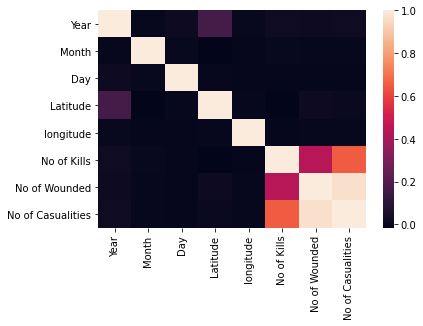

In [10]:
sns.heatmap(data.corr())

In [11]:
data.head(5)

,Year,Month,Day,Country,Region,State,City,Latitude,longitude,location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Used,No of Kills,No of Wounded,No of Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,0.0


In [12]:
data.describe()

,Year,Month,Day,Latitude,longitude,No of Kills,No of Wounded,No of Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


***Exploratory Data Analysis***

**Observations:->**

1.Dataset consists of all the terorist activities from 1970 to 2017

2.Maximum number of kills in a terror attack is 1570

3.Maximum number of Casualities in a attack is 9574

4.Data consists of Terror activities among 205 countries

In [13]:
data[['Year','Country','Attack Type']].nunique()

Year            47
Country        205
Attack Type      9
dtype: int64

In [14]:
d = data.groupby("Year")

In [15]:
attack=[[]]
attack = [[int(key),int(len(gr))] for key,gr in d]
Attack_data = pd.DataFrame(attack,columns=("Year","Attacks"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

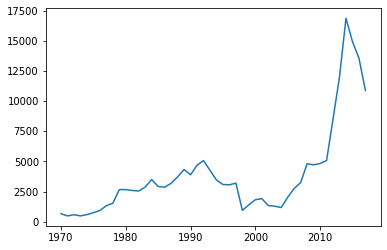

In [16]:
plt.plot(Attack_data["Year"],Attack_data["Attacks"])

In [17]:
casualities=[[]]
casual = [[int(key),gr["No of Casualities"].fillna(0).sum()] for key,gr in d]
Casualities_data = pd.DataFrame(casual,columns=("Year","No of Casualities"))

<IPython.core.display.Javascript object>

In [18]:
Killed=[[]]
Killed = [[int(key),gr["No of Kills"].fillna(0).sum()] for key,gr in d]
Kills_data = pd.DataFrame(Killed,columns=("Year","No of Kills"))

<IPython.core.display.Javascript object>

In [19]:
Wound=[[]]
Wound = [[int(key),gr["No of Wounded"].fillna(0).sum()] for key,gr in d]
Wounded_data = pd.DataFrame(Wound,columns=("Year","No of Casualities"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

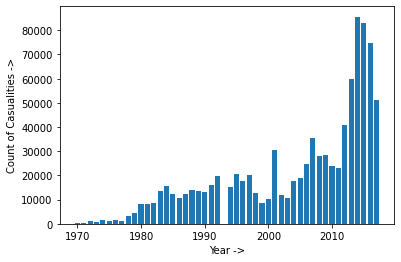

In [20]:
plt.bar(Casualities_data["Year"],Casualities_data["No of Casualities"])
plt.xlabel("Year ->")
plt.ylabel("Count of Casualities ->")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

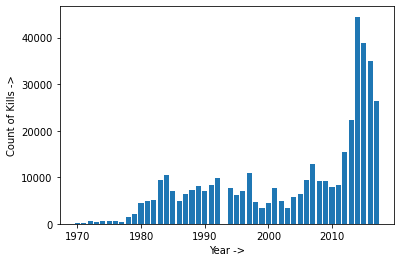

In [21]:
plt.bar(Kills_data["Year"],Kills_data["No of Kills"])
plt.xlabel("Year ->")
plt.ylabel("Count of Kills ->")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

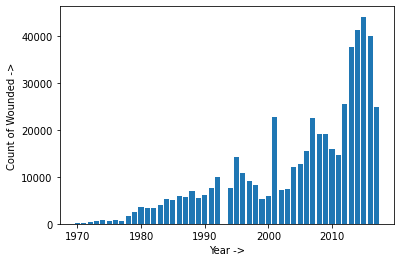

In [22]:
plt.bar(Wounded_data["Year"],Wounded_data["No of Casualities"])
plt.xlabel("Year ->")
plt.ylabel("Count of Wounded ->")
plt.show()

**2. Observations Based on Countries**

In [23]:
corr = pd.crosstab(data["Year"],data["Region"])
corr.head(5)

<IPython.core.display.Javascript object>

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


<IPython.core.display.Javascript object>

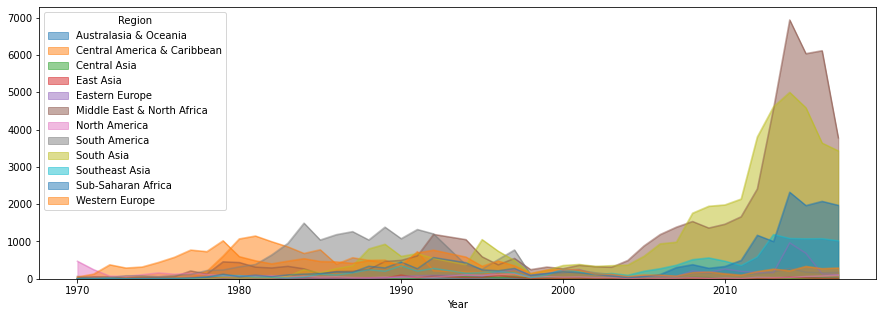

In [24]:
corr.plot(kind="area",figsize=(15,5),stacked=False)
plt.show()

In [25]:
corrt = corr.transpose()
corrt["Total"] = corrt.sum(axis=1)
corrt = corrt["Total"].sort_values(ascending=False)
corrt

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

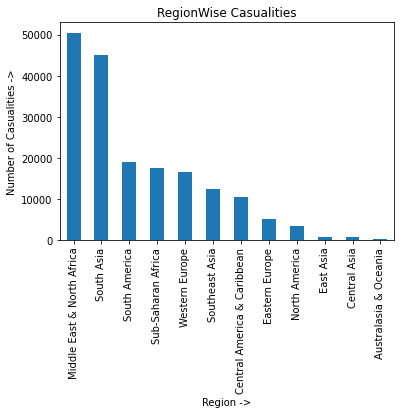

In [26]:
corrt.plot(kind="bar")
plt.title("RegionWise Casualities")
plt.ylabel("Number of Casualities ->")
plt.xlabel("Region ->")
plt.show()

**3. Observation Based on City**

In [27]:
city = data['City'].value_counts()[0:50]
city.head()

#Neglecting the unknown cities
city = city[1:20]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

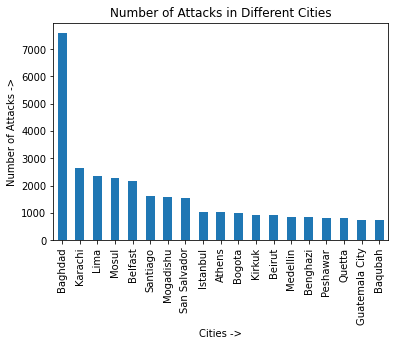

In [28]:
city = city.transpose()
city.plot(kind="bar")
plt.title("Number of Attacks in Different Cities")
plt.ylabel("Number of Attacks ->")
plt.xlabel("Cities ->")
plt.show()

In [29]:
city_casualities = data[['City','No of Casualities']].groupby('City').sum().sort_values(by="No of Casualities",ascending=False)[:20]
city_casualities

,No of Casualities
City,
Baghdad,77876.0
Unknown,35450.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

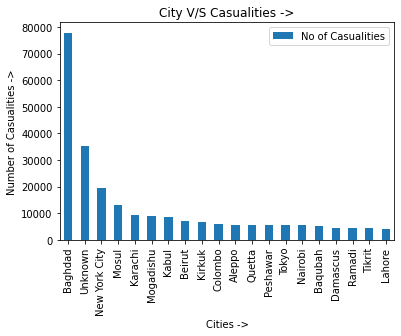

In [30]:
city_casualities.plot(kind="bar")
plt.title("City V/S Casualities ->")
plt.ylabel("Number of Casualities ->")
plt.xlabel("Cities ->")
plt.show()

**4. Observations on Attack Type**

In [31]:
attack_type = data['Attack Type'].value_counts()
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

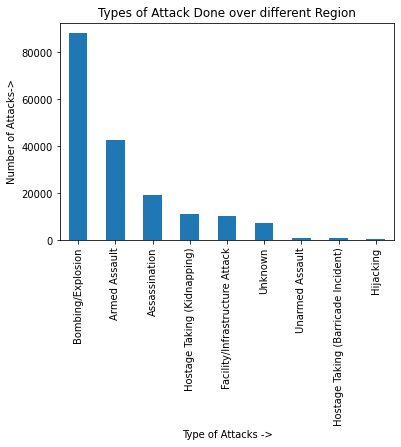

In [32]:
attack_type = attack_type.transpose()
attack_type.plot(kind='bar')
plt.xlabel("Type of Attacks ->")
plt.ylabel("Number of Attacks->")
plt.title("Types of Attack Done over different Region")
plt.show()

In [33]:
attack_type_casualities = data[['Attack Type','No of Casualities']].groupby('Attack Type').sum().sort_values(by="No of Casualities",ascending=False)[:20]
attack_type_casualities

,No of Casualities
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

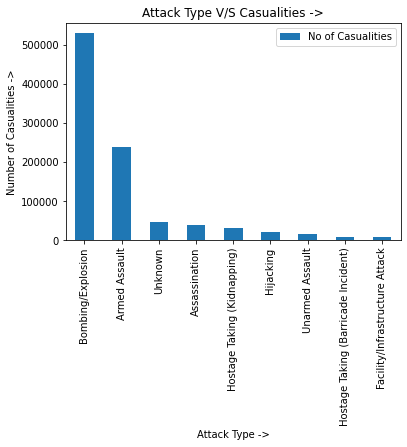

In [34]:
attack_type_casualities.plot(kind="bar")
plt.title("Attack Type V/S Casualities ->")
plt.ylabel("Number of Casualities ->")
plt.xlabel("Attack Type ->")
plt.show()

**5. Observation on Attack made by certain Group**

In [35]:
# Neglecting the attacks mde by unknown Group
group_name = data['Group Name'].value_counts()[1:21]
group_name.head()

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
Name: Group Name, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

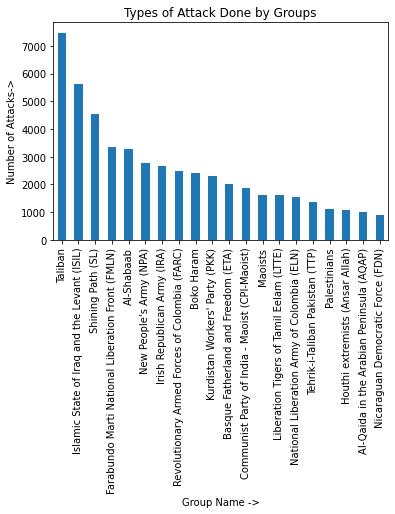

In [36]:
group_name = group_name.transpose()
group_name.plot(kind='bar')
plt.xlabel("Group Name ->")
plt.ylabel("Number of Attacks->")
plt.title("Types of Attack Done by Groups")
plt.show()

In [37]:
group_casualities = data[['Group Name','No of Casualities']].groupby('Group Name').sum().sort_values(by="No of Casualities",ascending=False)[1:21]
group_casualities.head()

,No of Casualities
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

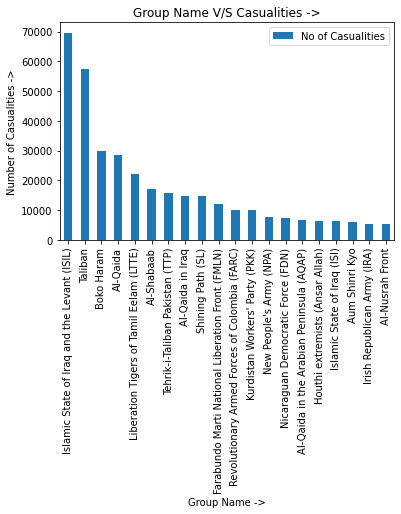

In [38]:
group_casualities.plot(kind="bar")
plt.title("Group Name V/S Casualities ->")
plt.ylabel("Number of Casualities ->")
plt.xlabel("Group Name ->")
plt.show()

**6.Observation on Weapons Used for Attack**

In [39]:
weapons_used = data['Weapon Used'].value_counts()
weapons_used

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

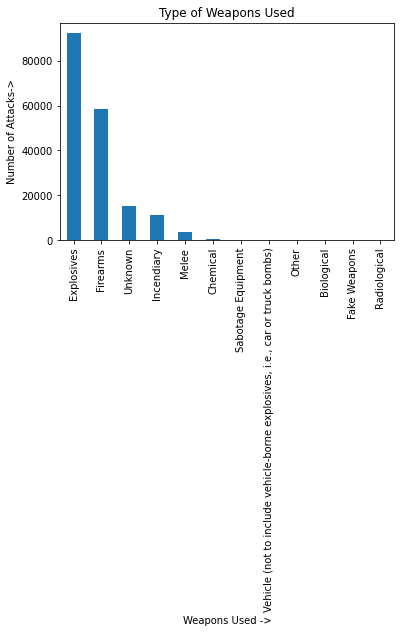

In [40]:
weapons_used.plot(kind='bar',)
plt.xlabel("Weapons Used ->")
plt.ylabel("Number of Attacks->")
plt.title("Type of Weapons Used")
plt.show()

In [41]:
weapon_casualities = data[['Weapon Used','No of Casualities']].groupby('Weapon Used').sum().sort_values(by="No of Casualities",ascending=False)
weapon_casualities.head()

,No of Casualities
Weapon Used,
Explosives,560181.0
Firearms,252113.0
Unknown,60195.0
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",20305.0
Melee,16070.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

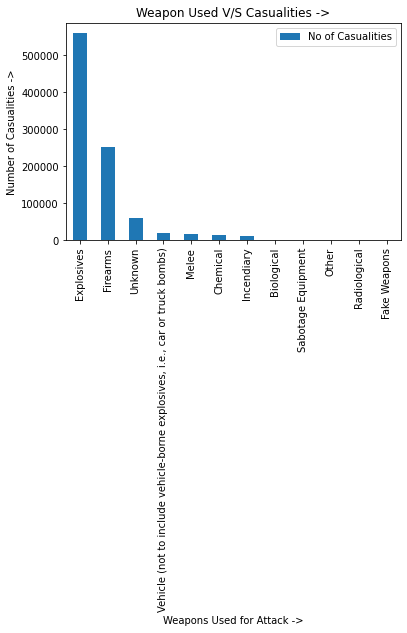

In [42]:
weapon_casualities.plot(kind="bar")
plt.title("Weapon Used V/S Casualities ->")
plt.ylabel("Number of Casualities ->")
plt.xlabel("Weapons Used for Attack ->")
plt.show()

**7. Observation on Targets of Attack**

In [43]:
Targets = data['Target Type'].value_counts()
Targets

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

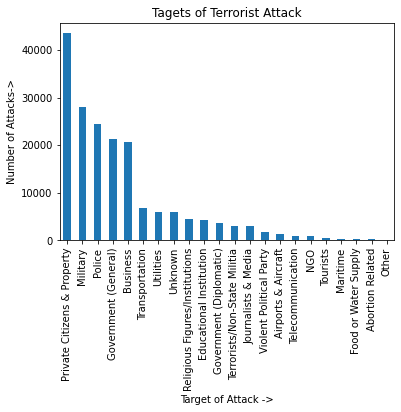

In [44]:
Targets.plot(kind='bar')
plt.xlabel("Target of Attack ->")
plt.ylabel("Number of Attacks->")
plt.title("Tagets of Terrorist Attack")
plt.show()

In [45]:
Target_casualities = data[['Target Type','No of Casualities']].groupby('Target Type').sum().sort_values(by="No of Casualities",ascending=False)
Target_casualities.head()

,No of Casualities
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

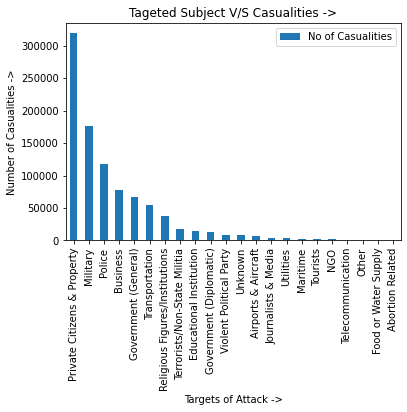

In [46]:
Target_casualities.plot(kind="bar")
plt.title("Tageted Subject V/S Casualities ->")
plt.ylabel("Number of Casualities ->")
plt.xlabel("Targets of Attack ->")
plt.show()

**8. Observation on Attacks Done by Groups In Cities**

In [47]:
Group_Country = data[["Group Name","Country",'No of Casualities']].groupby(["Group Name","Country"],axis=0).sum().sort_values(by = "No of Casualities",ascending=False)[:20]
Group_Country

,,No of Casualities
Group Name,Country,
Unknown,Iraq,129589.0
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Unknown,Pakistan,34570.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Unknown,Afghanistan,19787.0
Al-Qaida,United States,19494.0
Unknown,India,15631.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

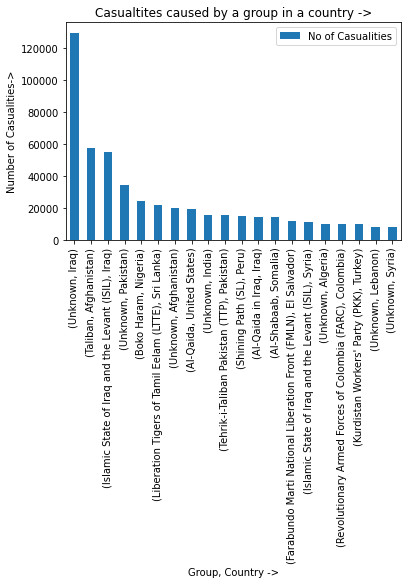

In [48]:
Group_Country.plot(kind='bar')
plt.xlabel("Group, Country ->")
plt.ylabel("Number of Casualities->")
plt.title("Casualtites caused by a group in a country ->")
plt.show()

**9. Overall Damage**

In [49]:
Number_of_Attacks = len(data)
Number_of_Attacks

181691

In [50]:
Number_of_Casualities = data.loc[:,"No of Casualities"].sum()
Number_of_Casualities

935737.0

In [51]:
Number_of_Deaths = data.loc[:,"No of Kills"].sum()
Number_of_Deaths

411868.0

In [52]:
Number_of_Wounded = data.loc[:,"No of Wounded"].sum()
Number_of_Wounded

523869.0

***Conclusion***

1.Overall Observation:

(i) Maximum number of attacks in 2014 in "Middle East & north Africa" caused 85618 Casualities

(ii) Minimum number of attacks in 1971 in "Australasia & Oceania" caused 282 Casualities

2.Overall Casualities:

(i) Total 935737 Casualities happened over 37 years with nearly 181691 attacks all over the world

(ii) Casualities consists of 411868 deaths and 523869 peoples were wounded